## Multivariate Linear Regression From Scratch
โมเดลเส้นตรงที่ทำนายจากข้อมูลรับเข้า (input) ซึ่งอาจมีได้มากกว่า 1 feature

Multivariate Linear Regression เราจะใช้ y = (m1*x1) + (m2*x2) + (m3*x3) + ....(mn*xn) + c

In [1]:
!pip install scikit-learn==1.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 41.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.10.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from tqdm import tnrange, tqdm_notebook
from IPython.display import HTML, display
from sklearn.datasets import load_boston

## Prepare Data (The Boston Housing Dataset)

Features

**CRIM**: Per capita crime rate by town

**ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

**INDUS**: Proportion of non-retail business acres per town

**CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**NOX**: Nitric oxide concentration (parts per 10 million)

**RM**: Average number of rooms per dwelling

**AGE**: Proportion of owner-occupied units built prior to 1940

**DIS**: Weighted distances to five Boston employment centers

**RAD**: Index of accessibility to radial highways

**TAX**: Full-value property tax rate per $10,000

**PTRATIO**: Pupil-teacher ratio by town

**B**: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

**LSTAT**: Percentage of lower status of the population

**MEDV**: Median value of owner-occupied homes in $1000s

In [3]:
boston_dataset = load_boston()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
print(boston_dataset.keys()) # check key
print(boston_dataset.filename)
print(boston_dataset.data.shape)
print(boston_dataset.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
boston_house_prices.csv
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
bos = pd.DataFrame(boston_dataset.data)
bos.columns = boston_dataset.feature_names
bos['PRICE'] = boston_dataset.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [20]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

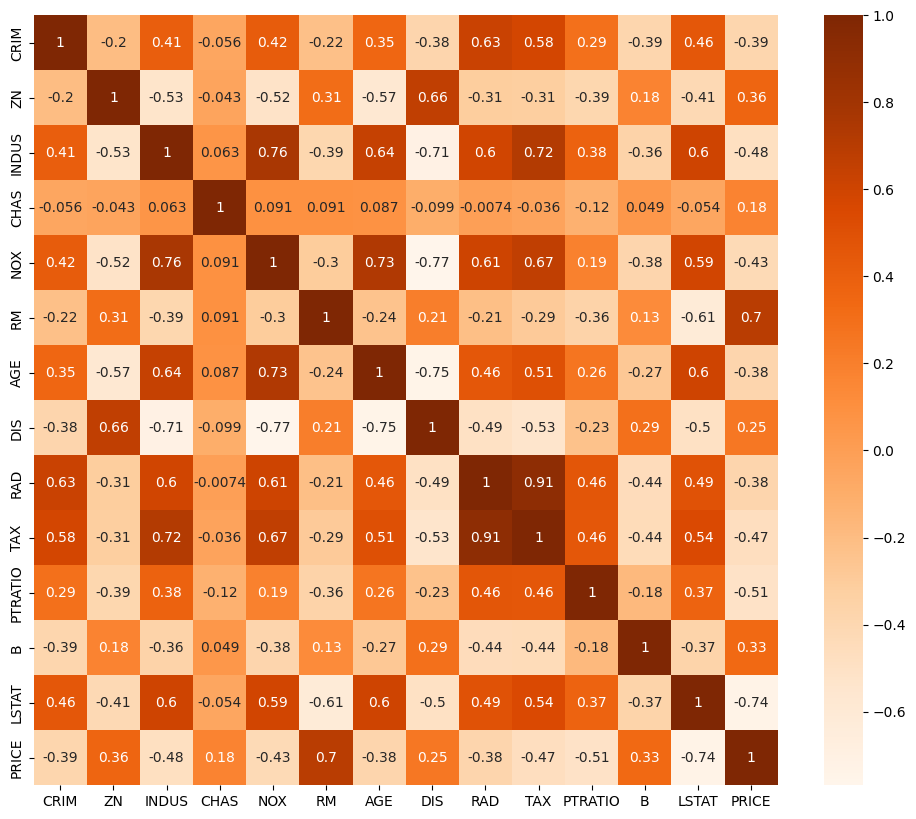

In [8]:
# Preview the correlation of each feature Using Pearson Correlation

plt.figure(figsize=(12,10))
cor = bos.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Oranges)
plt.show()

In [9]:
# Selecting highly correlated features (>0.5)
# features => RM, PTRATIO, และ LSTAT

cor_target = abs(cor["PRICE"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

In [21]:
X_bos = []
Y_bos = []

for i in range(len(X)):
  X_bos.append( ( X['RM'][i] , X['PTRATIO'][i] , X['LSTAT'][i] ) )
  Y_bos.append( Y[i] )

## Train-Test Split

In [23]:
# แบ่งข้อมูล train-set และ test-set
from sklearn.model_selection import train_test_split

X_bos_train, X_bos_test, Y_bos_train, Y_bos_test = train_test_split(X_bos, Y_bos, test_size=0.1, random_state=42)

X_bos_train, X_bos_val, Y_bos_train, Y_bos_val = train_test_split(X_bos_train, Y_bos_train, test_size=0.25, random_state=42)

print("X_bos_train shape :",len(X_bos_train))
print("X_bos_val shape :",len(X_bos_val))
print("X_bos_test shape :",len(X_bos_test))

X_bos_train shape : 341
X_bos_val shape : 114
X_bos_test shape : 51


## Functions

In [12]:
# function that return y of hypothesis function
def bos_hypothesis(theta0, theta1, theta2, theta3, x1, x2, x3):
	return (theta1*x1) + (theta2*x2) + (theta3*x3) + theta0

In [30]:
def cal_MSE(y, y_pred):
  mse = 0
  for i in range(len(y)):
    mse += (y[i]-y_pred[i])**2
  return (mse * 1.0) / len(y)

In [31]:
# find a loss function by bos_derivatives

def bos_derivatives(theta0, theta1, theta2, theta3, X_bos, Y_bos):
  dtheta0 = 0
  dtheta1 = 0
  dtheta2 = 0
  dtheta3 = 0

  for (xi, yi) in zip(X_bos, Y_bos):
    dtheta0 += (yi - bos_hypothesis(theta0, theta1, theta2, theta3, xi[0], xi[1], xi[2])) * -1
    dtheta1 += (yi - bos_hypothesis(theta0, theta1, theta2, theta3, xi[0], xi[1], xi[2])) * -1 * xi[0]
    dtheta2 += (yi - bos_hypothesis(theta0, theta1, theta2, theta3, xi[0], xi[1], xi[2])) * -1 * xi[1]
    dtheta3 += (yi - bos_hypothesis(theta0, theta1, theta2, theta3, xi[0], xi[1], xi[2])) * -1 * xi[2]

  dtheta0 /= len(X_bos)
  dtheta1 /= len(X_bos)
  dtheta2 /= len(X_bos)
  dtheta3 /= len(X_bos)

  return dtheta0, dtheta1, dtheta2, dtheta3

In [15]:
# bos_updateParameters

def bos_updateParameters(theta0, theta1, theta2, theta3, X_bos, Y_bos, alpha):
  dtheta0, dtheta1, dtheta2, dtheta3 = bos_derivatives(theta0, theta1, theta2, theta3, X_bos, Y_bos)

  # ปรับค่า theta0, theta1, theta2, theta3 ไปตามค่า alpha และค่า gradient
  theta0 = theta0 + (-1 * dtheta0 * alpha)
  theta1 = theta1 + (-1 * dtheta1 * alpha)
  theta2 = theta2 + (-1 * dtheta2 * alpha)
  theta3 = theta3 + (-1 * dtheta3 * alpha)

  return theta0, theta1, theta2, theta3

In [28]:
def bos_LinearRegression(X_bos_train, Y_bos_train, X_bos_val, Y_bos_val, epoch, alpha=0.0002):

  # Step1: กำหนดค่าเริ่มต้นให้กับ theta0, theta1, theta2, และ theta3 แบบสุ่ม (ใช้ฟังก์ชัน random)
  theta0 = np.random.rand()
  theta1 = np.random.rand()
  theta2 = np.random.rand()
  theta3 = np.random.rand()

  # Step2: วนลูป ตามจำนวน epoch เพื่อใช้ในการปรับ weight ให้กับ model
  for i in tnrange(0, epoch):
    y_pred_train = []

    for j in range(len(X_bos_train)):
      y_pred = bos_hypothesis(theta0, theta1, theta2, theta3, X_bos_train[j][0], X_bos_train[j][1], X_bos_train[j][2])
      y_pred_train.append(y_pred)


    # Step3: ปรับ weight ให้กับค่า theta3 theta2 theta1 และ theta0

    theta0, theta1, theta2, theta3 = bos_updateParameters(theta0, theta1, theta2, theta3, X_bos_train, Y_bos_train, alpha)

    if i % 100 == 0:
      y_pred_val = []

      for j in range(len(X_bos_val)):
        y_pred = bos_hypothesis(theta0, theta1, theta2, theta3, X_bos_val[j][0], X_bos_val[j][1], X_bos_val[j][2])
        y_pred_val.append(y_pred)

      # Step6: คำนวนค่า loss ของข้อมูล train ทุกๆ 10 epoch
      loss_val = cal_MSE(Y_bos_val ,y_pred_val)
      print("Validation loss :",loss_val)

  return theta0, theta1, theta2, theta3

In [35]:
bos_theta0, bos_theta1, bos_theta2, bos_theta3 = bos_LinearRegression(X_bos_train, Y_bos_train, X_bos_val, Y_bos_val, epoch=1000, alpha=0.001)

<ipython-input-28-49e1974f4486>:10: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(0, epoch):


  0%|          | 0/1000 [00:00<?, ?it/s]

Validation loss : 147.8310857997
Validation loss : 48.37694227366773
Validation loss : 45.06563540672105
Validation loss : 42.344217138052024
Validation loss : 40.15253872190972
Validation loss : 38.3908991288173
Validation loss : 36.97501368467278
Validation loss : 35.837025889903224
Validation loss : 34.92239731407411
Validation loss : 34.18729566765767


ทีนี้ลองมานำโมเดลมาใช้ทำนายผลกับ test data ดูสิว่ามีแม่นยำหรือไม่

In [36]:
# สุ่มหยิบข้อมูลจาก X_list

bos_index = random.randint(0,len(X_bos_test)-1)
bos_x_rand = X_bos_test[bos_index]

# ใช้สมการเส้นตรงที่เราสร้างขึ้นมาทำนายผลค่า Y
bos_pred = bos_hypothesis(bos_theta0, bos_theta1, bos_theta2, bos_theta3, bos_x_rand[0], bos_x_rand[1], bos_x_rand[2])

print("bos_x_rand :",bos_x_rand,"bos_pred :",bos_pred," bos_real :", Y_bos_test[bos_index])

bos_x_rand : (5.39, 19.2, 21.14) bos_pred : 12.81293575494952  bos_real : 19.7


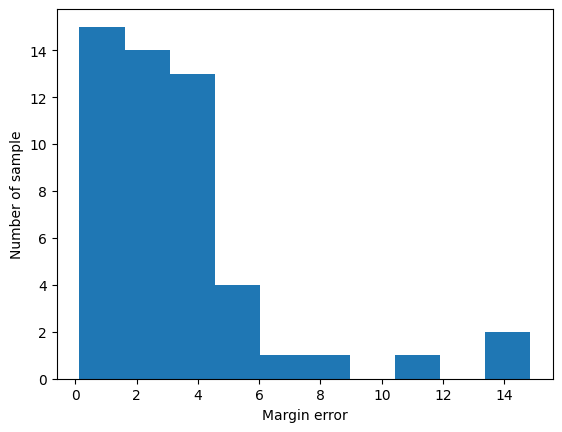

In [37]:
# สร้าง list ขึ้นมาเพื่อเก็บผลการทำนายในการนำไปใช้ในการเปรียบเทียบผลการทำนายและค่าจริิงของผลลัพธ์
bos_pred_plot = []

for i in range(len(X_bos_test)):
  bos_pred = bos_hypothesis(bos_theta0, bos_theta1, bos_theta2, bos_theta3, X_bos_test[i][0], X_bos_test[i][1], X_bos_test[i][2])
  bos_pred_plot.append(abs(bos_pred-Y_bos_test[i]))

counts, bins = np.histogram(bos_pred_plot)
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel('Margin error')
plt.ylabel('Number of sample')
plt.show()